# Load the libraries

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from Modules.Metrics import Accuracy, UnclassifiedPoints
from Modules.SupervisedLearning import LogisticRegression, SoftmaxRegression, Perceptron

# Load Medical dataset

In [2]:
def LoadData(type = "Standardized"):
    medical_data = pd.read_csv("data/Medical_data.csv")
    medical_data_test = pd.read_csv("data/test_medical.csv")

    x = medical_data.drop("Health", axis = 1).values
    y = medical_data["Health"].values
    xt = medical_data_test.drop("Health",axis = 1).values
    yt = medical_data_test["Health"].values

    if(type == "Standardized"):
        train_mu = x.mean(axis = 0)
        train_sigma = np.sqrt(x.var(axis = 0))

        x_ = (x - train_mu) / train_sigma

        x_train = x_
        y_train = y.copy()

        x_test = (xt.copy() - train_mu) / train_sigma
        y_test = yt.copy()
    else:
        x_train = x
        y_train = y

        x_test = xt
        y_test = yt
    
    y_ = y_train.copy()
    y_[y_ == "HEALTHY"] = 0
    y_[y_ == "SURGERY"] = 1
    y_[y_ == "MEDICATION"] = 2

    return medical_data, x_train, y_train, x_test, y_test, y_

medical_data, x_train, y_train, x_test, y_test, y_ = LoadData()

<IPython.core.display.Javascript object>


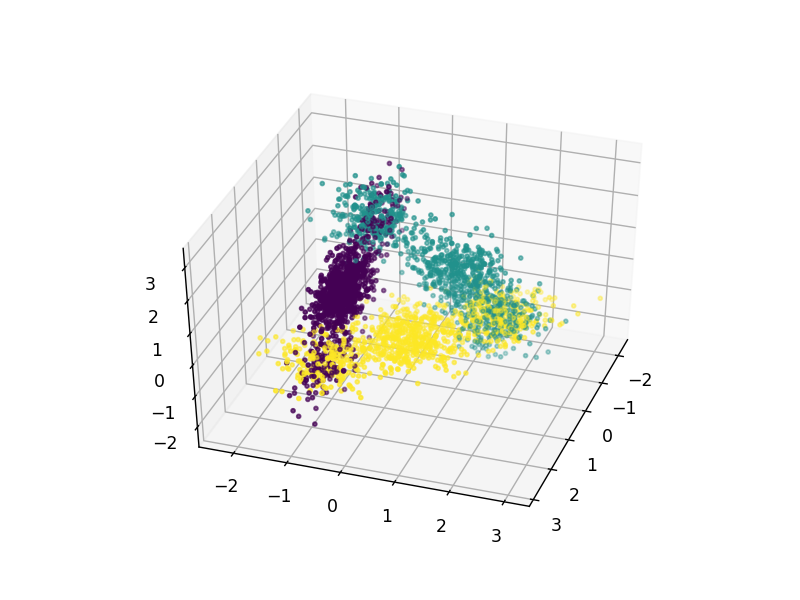

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x_train[:, 0], x_train[:, 1], x_train[:, 2], c = y_, marker = ".")

# Logistic regression (without regularization)

In [4]:
x_train_ = np.concatenate([x_train, x_train ** 2, x_train ** 4], axis = 1)
x_test_ = np.concatenate([x_test, x_test ** 2, x_test ** 4], axis = 1)

In [5]:
classifier = LogisticRegression()
classifier.Fit(x_train_, y_train, iterations = 10000)
predictions = classifier.Predict(x_test_, y_test)
Accuracy(predictions, y_test)

0.893

# Logistic regression (with regularization)

In [6]:
classifier = LogisticRegression(regularize = True)
classifier.Fit(x_train_, y_train, iterations = 10000, alpha = 0.001)
predictions = classifier.Predict(x_test_)
Accuracy(predictions, y_test)

0.8893333333333333

# Softmax regression

In [7]:
classifier = SoftmaxRegression()
classifier.Fit(x_train_, y_train, iterations = 1000)
predictions = classifier.Predict(x_test_)
Accuracy(predictions, y_test)

0.8866666666666667

# Perceptron

In [8]:
classifier = Perceptron()
predictions = classifier.Fit(x_train, y_train, epochs = 1)
print("Accuracy =", Accuracy(predictions, y_train))
print("Unclassified points =", UnclassifiedPoints(predictions))

Accuracy = 0.5526666666666666
Unclassified points = 633


<IPython.core.display.Javascript object>


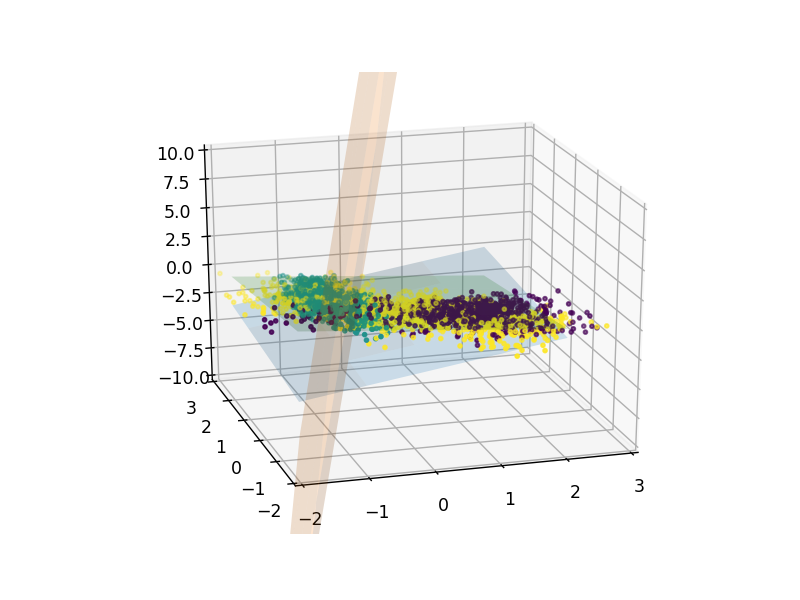

(-10, 10)

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x_train[:, 0], x_train[:, 1], x_train[:, 2], c = y_, marker = ".")

for normal in classifier.weights:
    normal = classifier.weights[normal]
    normal = normal.reshape(normal.shape[1])
    
    px, py = np.meshgrid(range(-2,3), range(-2,3))
    pz = -(normal[0] + normal[1] * px + normal[2] * py) /normal[3]
    
    ax.plot_surface(px, py, pz, alpha = 0.2)

plt.xlim(-2, 3)
plt.ylim(-2, 3)
ax.set_zlim(-10, 10)